<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Suavizacion_Exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
df = pd.read_csv('202107mensuales.csv', sep= ',', parse_dates=['fecha'], index_col='fecha',encoding='UTF-8')

In [8]:
ieps_cervezasp = df['ieps_cervezas']
ieps_cervezasp = ieps_cervezasp.dropna()
ieps_cervezasp.head()

fecha
2002-01-01     785.9
2002-02-01    1152.3
2002-03-01     540.0
2002-04-01     702.0
2002-05-01     826.0
Name: ieps_cervezas, dtype: float64

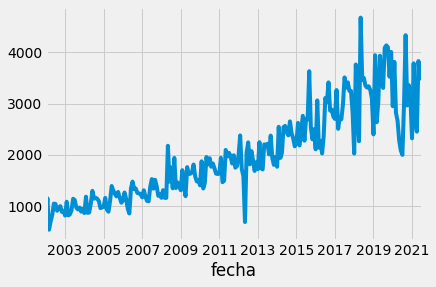

In [9]:
ieps_cervezasp.plot()

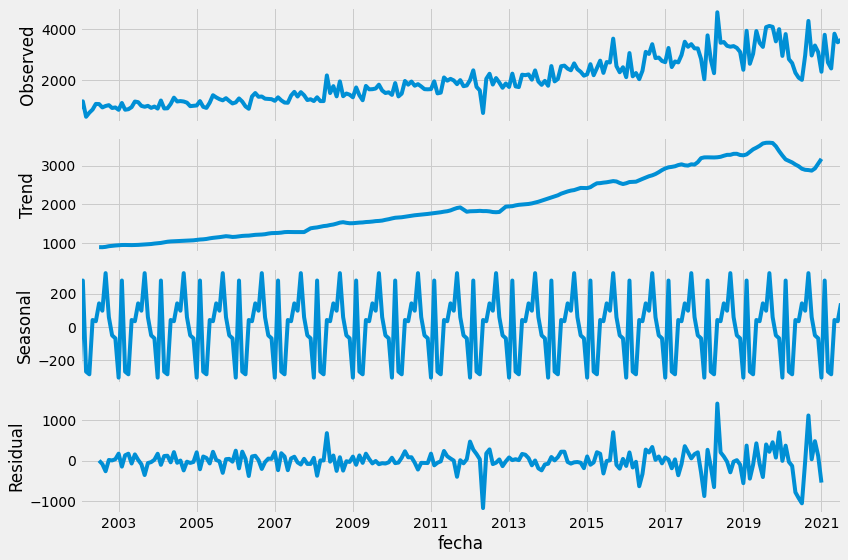

In [10]:
descomposicionA=seasonal_decompose(ieps_cervezasp, freq=12, model ='additive')
plt.rcParams['figure.figsize']=12,8
descomposicionA.plot()
plt.show()

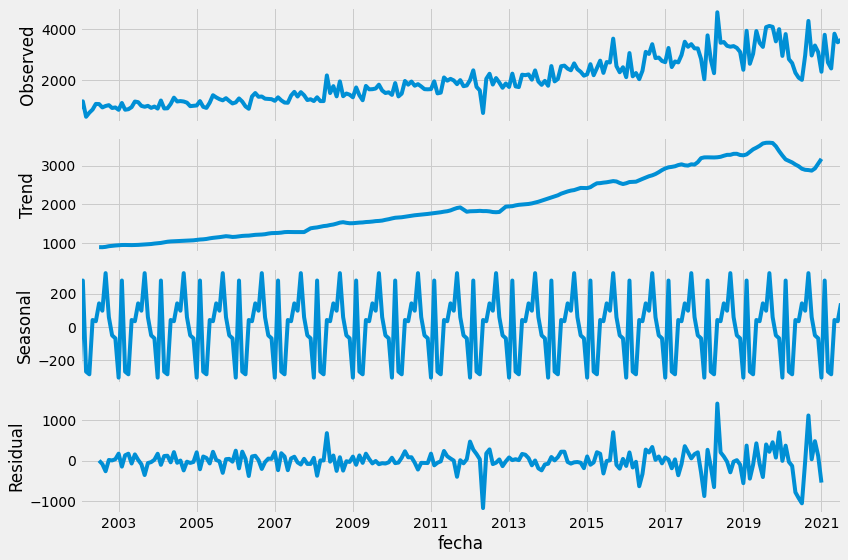

In [12]:
descomposicionM=seasonal_decompose(ieps_cervezasp, freq=12, model ='multiplicative')
plt.rcParams['figure.figsize']=12,8
descomposicionA.plot()
plt.show()

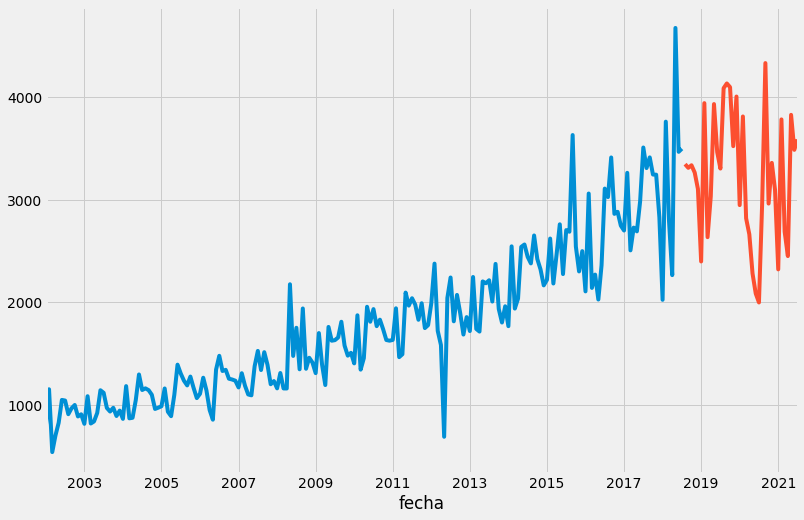

In [14]:
#Separacion en entrada entrenamiento y prueba
entrenamiento = ieps_cervezasp[:int(0.85*(len(ieps_cervezasp)))]
prueba = ieps_cervezasp[int(0.85*(len(ieps_cervezasp))):]
entrenamiento.plot()
prueba.plot()